<a href="https://colab.research.google.com/github/rp1177/CS440---Intro-to-AI/blob/main/BackwardA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
from collections import deque
from matplotlib import pyplot
import copy

In [ ]:
class Maze:
    def __init__(self):
        pass

    def generateMaze(self, dimensions):
        mazeArray = np.empty(dimensions)
        for i in range(mazeArray.shape[0]):
            for j in range(mazeArray.shape[1]):
                if (random.random() > .70):
                    mazeArray[i][j] = 0 # blocked
                else:
                    mazeArray[i][j] = 1 # unblocked

        # remove block from upper left/lower right corner
        mazeArray[0][0] = 1
        mazeArray[mazeArray.shape[0]-1][mazeArray.shape[1]-1] = 1

        return mazeArray

    def validateMaze(self, maze, goalX, goalY): #DFS
        path = deque()
        visited = dict()

        path.append((0,0))

        while path:
            current = path.pop()
            if (current[0] == goalX and current[1] == goalY):
                return True
            if (visited.get(current) != None):
                continue
            else:
                visited[current] = True

                #UP
                if current[0]-1 > 0 and maze[current[0]-1][current[1]] == 1:
                    path.append((current[0]-1, current[1]))
                #DOWN
                if current[0]+1 < maze.shape[0] and maze[current[0]+1][current[1]] == 1:
                    path.append((current[0]+1, current[1]))
                #LEFT
                if current[1]-1 > 0 and maze[current[0]][current[1]-1] == 1:
                    path.append((current[0], current[1]-1))
                #RIGHT
                if current[1]+1 < maze.shape[1] and maze[current[0]][current[1]+1] == 1:
                    path.append((current[0], current[1]+1))

        return False


    def printMaze(self, maze):
        fig, ax = pyplot.subplots()
        pyplot.axis('off')
        ax.imshow(maze)
        pyplot.show()

    def printMazePath(self, maze, x_coords, y_coords):
        fig, ax = pyplot.subplots()
        pyplot.axis('off')
        #print('ptint path')
        # pyplot.legend()
        ax.imshow(maze)
        ax.plot(y_coords, x_coords, color = 'red')
        pyplot.show()

In [ ]:
import math
import heapq

class A_Star_Cell:
    def __init__(self):
        self.g = math.inf
        self.h = math.inf
        self.f = math.inf
        self.gd = math.inf

    def setGAndFValues(self, g):
        self.g = g
        #if initialRun == False:
         # self.h = self.gd - self.g
        self.f = self.g + self.h

In [ ]:
class Agent2:
    def __init__(self):
        self.curr = (0,0)
        self.next = (0,0)
        self.path = []
        self.savePath = []

    def get_path(self):
        return self.path

    def set_path(self, newPath):
        self.path = newPath

    def setHeuristics(self, heuristicsMap, start, target, dimensions):
        for i in range(0, dimensions[0]):
            for j in range(0, dimensions[1]):
                heuristicsMap[i][j].h = np.abs(i-target[0])+np.abs(j-target[1])

    def adaptiveA(self):#heuristicsMap, start, target, dimensions):
        path = self.path
        x = len(path)-1
        for k in range(0, len(path)):
            #print(path[k], x)
            #heuristicsMap[i][j].gd = x
            x = x - 1

    def lookUp(self, currentMaze, originalMaze):
        currentX = self.curr[0]
        currentY = self.curr[1]
        #UP
        if currentX-1 > 0 and currentMaze[currentX-1][currentY]!=3:
            currentMaze[currentX-1][currentY] = originalMaze[currentX-1][currentY]
        #DOWN
        if currentX+1 < maze.shape[0] and currentMaze[currentX+1][currentY] != 3:
            currentMaze[currentX+1][currentY] = originalMaze[currentX+1][currentY]
        #LEFT
        if currentY-1 > 0 and currentMaze[currentX][currentY-1]!= 3:
            currentMaze[currentX][currentY-1] = originalMaze[currentX][currentY-1]
        #RIGHT
        if currentY+1 < maze.shape[1] and currentMaze[currentX][currentY+1] != 3 :
            currentMaze[currentX][currentY+1] = originalMaze[currentX][currentY+1]

        return currentMaze


    def A_Star(self, maze, goal_cell, start_cell):
        size = maze.shape[0]
        start_x = start_cell[0]
        start_y = start_cell[1]
        goal_x = goal_cell[0]
        goal_y = goal_cell[1]
        heuristicsMap = np.array([[A_Star_Cell() for _ in range(maze.shape[0])] for _ in range(maze.shape[1])])
        #if counter == 0:
        self.setHeuristics(heuristicsMap, start_cell, goal_cell, maze.shape)
        heuristicsMap[start_x][start_y].setGAndFValues(0)
        #else:
        #  self.adaptiveA(heuristicsMap, start_cell, goal_cell, maze.shape)
        #  heuristicsMap[start_x][start_y].setGAndFValues(0, False)
        openList = [] #we will use the heapq module to insert elements with priority in this list
        visited = {}
        closed = {}
        parent = {}
        heapq.heappush(openList, (heuristicsMap[start_x][start_y].f, heuristicsMap[start_x][start_y].h, (start_x, start_y)))
        visited[(start_x, start_y)] = True
        while openList:
            currentMazeNode = heapq.heappop(openList)[-1]
            currentHeuristicCell = heuristicsMap[currentMazeNode[0]][currentMazeNode[1]]
            closed[currentMazeNode] = True
            if currentMazeNode[0] == goal_x and currentMazeNode[1] == goal_y:
                path = []
                current = currentMazeNode
                while (current[0], current[1]) != (start_x, start_y):
                    path.append([current[0], current[1]])
                    current = parent[(current[0], current[1])]
                path.append([current[0],current[1]])
                self.path = path[::-1]

            children = []

            for new_pos in [(0,1),(0,-1),(1,0),(-1,0)]:

                node_pos = (currentMazeNode[0]+new_pos[0], currentMazeNode[1]+new_pos[1])

                if(node_pos[0] >= size or node_pos[1] >= size or node_pos[0] < 0 or node_pos[1] < 0):
                    continue

                if(maze[node_pos[0]][node_pos[1]] == 0):
                    continue

                if((node_pos[0], node_pos[1]) in closed):
                    continue

                if((node_pos[0], node_pos[1]) in visited):
                    if currentHeuristicCell.g + 1 + heuristicsMap[node_pos[0]][node_pos[1]].h < heuristicsMap[node_pos[0]][node_pos[1]].f:
                        openList.remove((heuristicsMap[node_pos[0]][node_pos[1]].f, heuristicsMap[node_pos[0]][node_pos[1]].h, (node_pos[0], node_pos[1])))
                        heuristicsMap[node_pos[0]][node_pos[1]].setGAndFValues(currentHeuristicCell.g+1)
                        heapq.heappush(openList, (heuristicsMap[node_pos[0]][node_pos[1]].f, heuristicsMap[node_pos[0]][node_pos[1]].h, (node_pos[0], node_pos[1])))
                        parent[(node_pos[0],node_pos[1])] = currentMazeNode
                else:
                    heuristicsMap[node_pos[0]][node_pos[1]].setGAndFValues(currentHeuristicCell.g+1)
                    children.append((node_pos[0], node_pos[1]))
                    parent[(node_pos[0],node_pos[1])] = currentMazeNode

            if(children == []):
                continue

            for child in children:
                heapq.heappush(openList, (heuristicsMap[child[0]][child[1]].f,heuristicsMap[child[0]][child[1]].h, (child[0], child[1])))
                visited[(child[0], child[1])] = True

    def move(self, currentMaze, originalMaze, route):
        if not self.path:
            return 1
        #print(self.path)
        self.path = self.path[::-1]
        #print(self.path)
        #print(len(self.path))
        for i in range(0,len(self.path)):
            step = tuple(self.path[i])
            #print(step)
            self.curr = step
            route.append(step)
            if step == (currentMaze.shape[0]-1, currentMaze.shape[1]-1): #reached goal, win
                return 1
            currentMaze[step] = 3 #continue
            self.next = tuple(self.path[i+1])
            #print(self.next)
            if originalMaze[self.next[0]][self.next[1]] == 0:
                return 5;



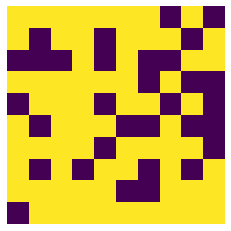

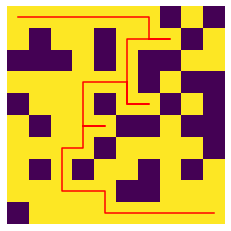

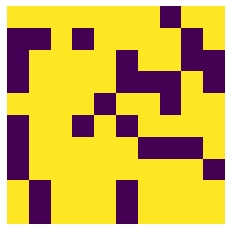

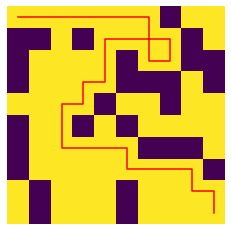

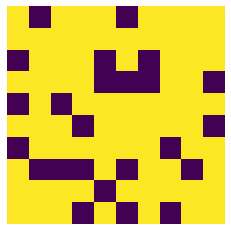

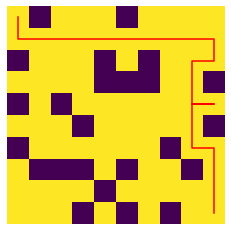

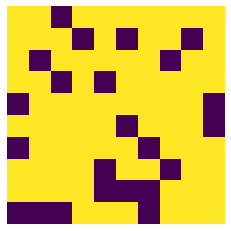

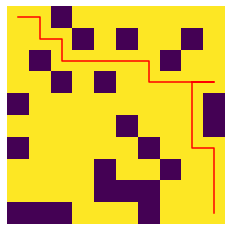

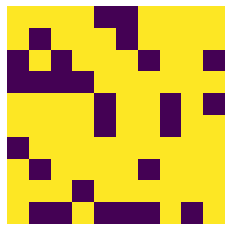

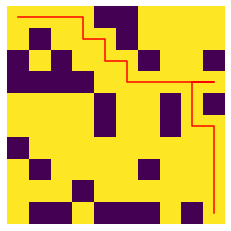

In [ ]:
if __name__=="__main__":

    #This is the maze size
    dimensions = [10, 10]

    myMaze = Maze()

    #Generate 100 valid mazes
    mazeList = []
    while len(mazeList) < 5:
        maze = myMaze.generateMaze(dimensions)
        if myMaze.validateMaze(maze, dimensions[0]-1, dimensions[1]-1):
            mazeList.append(maze)


    # Initialize Agent 2
    counter = 0
    for originalMaze in mazeList.copy():
        myAgent2 = Agent2()
        myMaze.printMaze(originalMaze)
        currentMaze = np.ones((dimensions[0], dimensions[1]))
        route = []
        status = 0
        while status != 1:
            currentMaze = myAgent2.lookUp(currentMaze, originalMaze)
            #myMaze.printMaze(currentMaze)
            myAgent2.A_Star(currentMaze, (myAgent2.curr[0],myAgent2.curr[1]), (dimensions[0]-1, dimensions[1]-1))
            #print("A* called")
            result = myAgent2.move(currentMaze, originalMaze, route)
            #print(result);
            # if result == 5:
            #     print("Reach blocked");
            status = result

        x_coords = []
        y_coords = []
        #print(route)


        for i in (range(0,len(route))):

          x = route[i][0]
          y = route[i][1]
          #print(x)
          #print(y)

          x_coords.append(x)
          y_coords.append(y)
        myMaze.printMazePath(originalMaze, x_coords, y_coords)


        #myMaze.printMaze(originalMaze)